# <span style="color:blue"> NSL Exercise lesson 2. </span> 
 
## <span style="color:red"> Exercise 2.1. </span>
 
### 1.  & 2.
 
It is requested to make an estimation of 

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ 

and its uncertainty, as standard deviation, as a function of the number of throws in each block. 

At first the simulation is carried out using random numbers evenly distributed in the interval $[0,1]$. Then, the same integration is carried out using importance sampling. In this case, at first it was chosen $q(x)=\frac{\pi}{2}(1-x)$ as sampling function, but after normalization it did no longer fit the integrand function quite well . For this reason, after some reasoning it was chosen $p(x)=2 (1-x)$ as new normalized sampling function. In both cases it was chosen $M=10^6$ and $N=100$, as parameters of the simulations.

The following script makes use of python libraries to load data from a file produced by the attached C++ code.

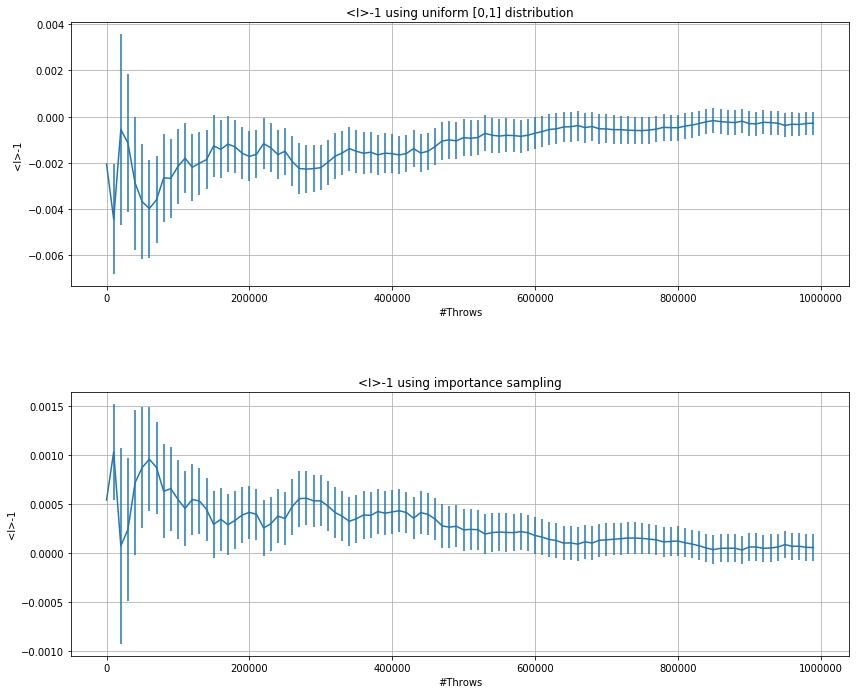

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, err, sum_imp, err_imp=np.loadtxt("data1.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, sum, yerr=err)
ax[0].set_title("<I>-1 using uniform [0,1] distribution")
ax[0].set(xlabel="#Throws", ylabel="<I>-1")
ax[0].grid(True)

ax[1].errorbar(x, sum_imp, yerr=err_imp)
ax[1].set_title("<I>-1 using importance sampling")
ax[1].set(xlabel="#Throws", ylabel="<I>-1")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

As expected, using the same number of throws in both integrations, the second one carried out using importance sampling method shows values affected by smaller uncertainties. Indeed, you can take a look at file "data1.dat" and verify that data in the fifth column (uncertainty using importance sampling) are more than three times smaller than data in the third column (uncertainty using a uniform distribution).

## <span style="color:red"> Exercise 2.2. </span>
 
### 1.  & 2.

The task of the exercise is simulating a random walk and make two pictures of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ under two different conditions:
1. in a cubic lattice with lattice constant $a=1$, where at each discrete time the walker makes a forward or backward step of length equal to $a=1$ in one of the 3 principal directions of the lattice;
2. in the continuum, where at each discrete time the walker makes a step of equal length as above along a random direction obtained sampling uniformly the solid angle.

In both cases it was chosen to repeat the simulation $10^5$ times, using $N=100$ blocks and $n_{steps} \in [0,10^2]$ to carry out the extimation.

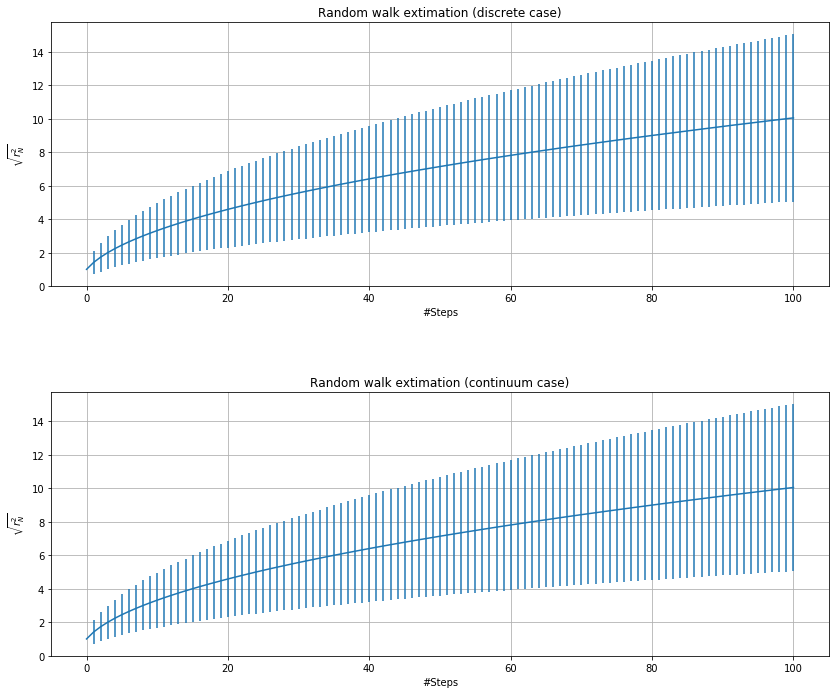

In [19]:
n, sumd, errd, sumc, errc=np.loadtxt("data2.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)
    
ax[0].errorbar(n, sumd, yerr=errd)
ax[0].set_title('Random walk extimation (discrete case)')
ax[0].set(xlabel="#Steps", ylabel='$\sqrt{r_{N}^2}$')
ax[0].grid(True)

ax[1].errorbar(n, sumc, yerr=errc)
ax[1].set_title("Random walk extimation (continuum case)")
ax[1].set(xlabel="#Steps", ylabel='$\sqrt{r_{N}^2}$')
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()    

As you can clearly see in the plots above, the results are almost the same and can be easily described by a function $f(N)\propto \sqrt{N}$. In particular, the uncertainty was computed using the well known propagation techniques through partial derivatives (you can find more details in the attached code "class.cpp"). As a result, the uncertainty itself is proportional to $\frac{1}{2} \sqrt{N}$, as you can find fitting the results on the third and fifth columns of file data2.dat using the script below.

In [20]:
from math import sqrt
from scipy import optimize

def f(x,a):                 #Fitting function f(x)=a*x^(1/2)
    return a*np.sqrt(x)

print('\n' "Optimal parameters")

opt_param=optimize.curve_fit(f,n,sumd, p0=[0.5])         #Fitting mean value discrete case
print('\n' 'Discrete case r^(1/2):', opt_param[0])

opt_param=optimize.curve_fit(f,n,errd, p0=[0.5])         #Fitting standard deviation discrete case
print('Discrete case \u03C3:', opt_param[0], '\n')

opt_param=optimize.curve_fit(f,n,sumc, p0=[0.5])         #Fitting mean value continuum case
print('Continuum case r^(1/2):', opt_param[0])

opt_param=optimize.curve_fit(f,n,errc, p0=[0.5])         #Fitting standard deviation continuum case
print('Continuum case \u03C3:', opt_param[0])


Optimal parameters

Discrete case r^(1/2): [1.00968921]
Discrete case σ: [0.50231399] 

Continuum case r^(1/2): [1.00959207]
Continuum case σ: [0.5022657]


Last but not least, we can argue about the diffusive behaviour of both random walk simulations. As we've seen above, both simulations can be well fitted using a function $f(N)=k \sqrt{N}$ where $k\approx1$, while for the uncertainties $k\approx \frac{1}{2}$. From the theory, we know that a diffusive process is governed by the equation 

$$\frac{\partial\rho(\vec{x},t)}{\partial t}=D\cdot\nabla^2\rho(\vec{x},t)$$

where $D$ is a diffusive constant. A possible solution of the equation is given by the function 

$$\rho(\vec{x},t)=\frac{1}{(4\pi Dt)^ \frac{3}{2}} \exp\left[-\frac{\|\vec{x}\|^2}{4Dt}\right]$$

Since this type of solution is clearly a 3D gaussian distribution in the events space, we can easily compute its standard deviation as $\sigma^2=2Dt\equiv\langle\|\vec{x}\|^2\rangle$. Therefore, knowing that the constant $D=a^2/(2\tau)$ and that the time $t$ is proportional to the number of steps $N$ through the average time between each step $\tau$, i.e. $t=N\tau$, we obtain 

$$\sigma=\sqrt{2Dt}=\sqrt{a^2 N}=a\sqrt{N}=\sqrt{\langle\|\vec{x}\|^2\rangle}$$

This is precisely what we've obtained above, under the obvious assumption that $a=1 \approx k$. Therefore, we can conclude that both simulations behave like a diffusive process.